## Did the impeachment skew the polls significantly?
## Was it predicatable?

Let's review the timeline of everything before we start
 
- September-November : Inquiry
- December 18, 2020 : Impeached by US HoR
- January 16, 2020 : Passed the Senate
- February 5, 2020 : Acquitted

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression

Create a training and testing model

What was Donald Trump's approval rating during his impeachment trial?

Impeached by the US HoR:

In [44]:
approval_df = pd.read_csv("president_approval_polls.csv")
approval_df.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,119194,64608,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/25/20,2/27/20,NaN,True,2/28/20 09:27,NaN,http://www.rasmussenreports.com/public_content...,538,47.0,52.0
1,119031,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,42.0,53.0
2,119032,64571,2020.0,NaN,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2/24/20,2/26/20,NaN,NaN,2/26/20 15:33,NaN,https://morningconsult.com/wp-content/uploads/...,538,43.0,55.0
3,119075,64583,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,2/24/20,2/26/20,NaN,True,2/27/20 09:26,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
4,119267,64591,2020.0,NaN,Donald Trump,590,Fox News/Beacon Research/Shaw & Co. Research,NaN,NaN,Fox News,...,2/23/20,2/26/20,NaN,NaN,2/28/20 18:00,NaN,https://www.scribd.com/document/449414637/Fox-...,538,47.0,52.0


In [45]:
approval_df.dtypes

question_id               int64
poll_id                   int64
cycle                   float64
state                   float64
politician               object
pollster_id               int64
pollster                 object
sponsor_ids              object
sponsors                 object
display_name             object
pollster_rating_id      float64
pollster_rating_name     object
fte_grade                object
sample_size               int64
population               object
population_full          object
methodology              object
start_date               object
end_date                 object
sponsor_candidate       float64
tracking                 object
created_at               object
notes                    object
url                      object
source                   object
yes                     float64
no                      float64
dtype: object

In [63]:
house = approval_df.loc[330:].copy()
house.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
330,114969,63145,2020.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,12/16/19,12/17/19,NaN,NaN,12/18/19 08:48,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,41.0,53.0
331,114970,63145,2020.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,12/16/19,12/17/19,NaN,NaN,12/18/19 08:48,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,45.0,53.0
332,114953,63139,2020.0,NaN,Donald Trump,1102,Emerson College,43,7News,Emerson College,...,12/15/19,12/17/19,NaN,NaN,12/17/19 21:07,NaN,http://emersonpolling.com/2019/12/18/december-...,538,46.3,48.6
333,114978,63147,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,12/15/19,12/17/19,NaN,True,12/18/19 09:35,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,49.0,49.0
334,115130,63176,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/15/19,12/17/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,52.0


In [64]:
house_df = house.set_index('poll_id')
A = np.arange(len(house_df))
A = np.flip(A,0)
house_df['count'] = A
house_df.reset_index(inplace = True)
house_df

,poll_id,question_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,count
0,63145,114969,2020.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,12/17/19,NaN,NaN,12/18/19 08:48,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,41.0,53.0,6513
1,63145,114970,2020.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,12/17/19,NaN,NaN,12/18/19 08:48,NaN,https://www.ipsos.com/sites/default/files/ct/n...,538,45.0,53.0,6512
2,63139,114953,2020.0,NaN,Donald Trump,1102,Emerson College,43,7News,Emerson College,...,12/17/19,NaN,NaN,12/17/19 21:07,NaN,http://emersonpolling.com/2019/12/18/december-...,538,46.3,48.6,6511
3,63147,114978,2019.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,12/17/19,NaN,True,12/18/19 09:35,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,49.0,49.0,6510
4,63176,115130,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,12/17/19,NaN,NaN,12/23/19 13:11,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,52.0,6509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,49426,77560,2017.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,1/24/17,NaN,True,3/1/17 17:53,NaN,http://polling.reuters.com/#poll/CP3_2/filters...,Reuters,45.2,44.3,4
6510,49426,77599,2017.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,1/24/17,NaN,True,3/1/17 17:53,NaN,http://polling.reuters.com/#poll/CP3_2/,Huffpost | Reuters,42.1,45.2,3
6511,49262,77274,2017.0,NaN,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/23/17,NaN,True,2/6/17 17:48,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,45.0,46.0,2
6512,49249,77261,2017.0,NaN,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,1/22/17,NaN,NaN,2/6/17 17:42,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,538 | Huffpost,46.0,37.0,1


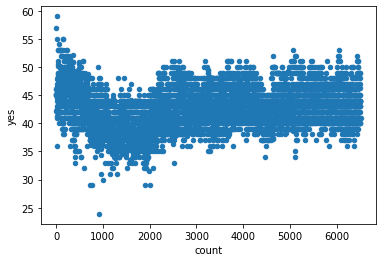

In [66]:
house_df.plot(kind='scatter', x='count', y='yes')

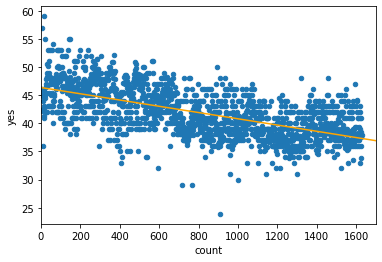

In [70]:
house_df_train = house_df.loc[4885:].copy()
house_df_test = house_df.loc[:4886].copy()

X_train = house_df_train[["count"]]
X_test = house_df_test[["count"]]
y_train = house_df_train["yes"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
X_new["count"] = np.linspace(0, 1700, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
y_new_ = pd.Series(
    model.predict(X_new), # y values in Series.plot.line()
    index=X_new["count"]    # x values in Series.plot.line()
)

# plot the data, then the model
house_df_train.plot.scatter(x="count", y="yes")
y_new_.plot.line(color='orange')

Passed the Senate: Jan 16 2020

In [50]:
senate = approval_df.loc[211:].copy()
senate.head()

,question_id,poll_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
211,115871,63293,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/14/20,1/16/20,NaN,NaN,1/17/20 11:08,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,40.0,52.0
212,115872,63293,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/14/20,1/16/20,NaN,NaN,1/17/20 11:08,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,56.0
213,115815,63284,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/13/20,1/15/20,NaN,NaN,1/15/20 14:53,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,39.0,52.0
214,115816,63284,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/13/20,1/15/20,NaN,NaN,1/15/20 14:53,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,43.0,54.0
215,115829,63287,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,1/13/20,1/15/20,NaN,True,1/16/20 09:31,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,51.0,47.0


In [51]:
senate_df = senate.set_index('poll_id')
B = np.arange(len(senate_df))
B = np.flip(B,0)
senate_df['count'] = B
senate_df.reset_index(inplace = True)
senate_df

,poll_id,question_id,cycle,state,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no,count
0,63293,115871,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/16/20,NaN,NaN,1/17/20 11:08,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,40.0,52.0,6632
1,63293,115872,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/16/20,NaN,NaN,1/17/20 11:08,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,42.0,56.0,6631
2,63284,115815,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/15/20,NaN,NaN,1/15/20 14:53,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,39.0,52.0,6630
3,63284,115816,2020.0,NaN,Donald Trump,568,YouGov,NaN,NaN,YouGov,...,1/15/20,NaN,NaN,1/15/20 14:53,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,538,43.0,54.0,6629
4,63287,115829,2020.0,NaN,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,...,1/15/20,NaN,True,1/16/20 09:31,NaN,http://www.rasmussenreports.com/public_content...,Rasmussen,51.0,47.0,6628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,49426,77560,2017.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,1/24/17,NaN,True,3/1/17 17:53,NaN,http://polling.reuters.com/#poll/CP3_2/filters...,Reuters,45.2,44.3,4
6629,49426,77599,2017.0,NaN,Donald Trump,744,Ipsos,71,Reuters,Ipsos,...,1/24/17,NaN,True,3/1/17 17:53,NaN,http://polling.reuters.com/#poll/CP3_2/,Huffpost | Reuters,42.1,45.2,3
6630,49262,77274,2017.0,NaN,Donald Trump,169,Gallup,NaN,NaN,Gallup,...,1/23/17,NaN,True,2/6/17 17:48,NaN,http://www.gallup.com/poll/201617/gallup-daily...,538 | Huffpost,45.0,46.0,2
6631,49249,77261,2017.0,NaN,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,1/22/17,NaN,NaN,2/6/17 17:42,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,538 | Huffpost,46.0,37.0,1


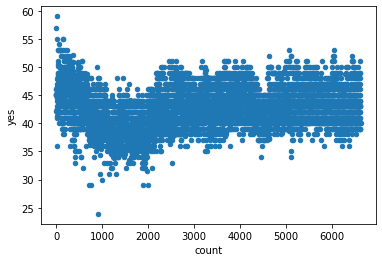

In [52]:
senate_df.plot(kind='scatter', x='count', y='yes')

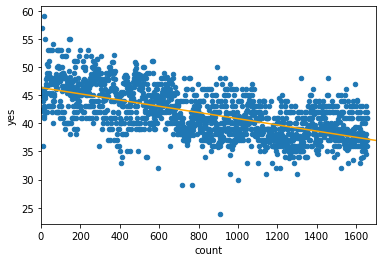

In [71]:
senate_df_train = senate_df.loc[4974:].copy()
senate_df_test = senate_df.loc[:4975].copy()

senate_X_train = senate_df_train[["count"]]
senate_X_test = senate_df_test[["count"]]
senate_y_train = senate_df_train["yes"]

senate_model = LinearRegression()
senate_model.fit(X=senate_X_train, y=senate_y_train)
senate_model.predict(X=senate_X_test)

senate_X_new = pd.DataFrame()
# create a sequence of 200 evenly spaced numbers from 0 to 50
senate_X_new["count"] = np.linspace(0, 1700, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
senate_y_new_ = pd.Series(
    senate_model.predict(senate_X_new), # y values in Series.plot.line()
    index=senate_X_new["count"]    # x values in Series.plot.line()
)

# plot the data, then the model
senate_df_train.plot.scatter(x="count", y="yes")
# plotting the line gets messed up for whatever reason
senate_y_new_.plot.line(color='orange')